In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
catalog.list()

['raw_data',
 'codebook',
 'intermediate_data',
 'primary_data',
 'r_labels',
 's_labels',
 'feature_data_r',
 'min_return',
 'risk_aversion',
 'target_variable',
 'gambling_variety',
 'other_features',
 'model_input',
 'parameters']

In [4]:
df = pd.DataFrame(catalog.load("raw_data"))

2023-05-08 00:53:11,109 - kedro.io.data_catalog - INFO - Loading data from 'raw_data' (CSVDataSet)...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Columns: 202 entries, SRCID to StateMap
dtypes: float64(5), int64(105), object(92)
memory usage: 3.2+ MB


In [6]:
# Replace empty strings with None values
df.replace(' ', np.nan, inplace=True)

# Replace -98, -99 with None values
df.replace(-99, np.nan, inplace=True)
df.replace(-98, np.nan, inplace=True)
df.replace(-99.0, np.nan, inplace=True)
df.replace(-98.0, np.nan, inplace=True)

In [7]:
df = df.convert_dtypes()


In [8]:
df["IntDate"] = pd.to_datetime(df["IntDate"])

In [9]:
# set column 'SRCID' as the index
df.set_index('SRCID', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2054 entries, 39 to 2334
Columns: 201 entries, IntDate to StateMap
dtypes: Float64(5), Int64(104), datetime64[ns](1), string(91)
memory usage: 3.4 MB


In [11]:
df.head()

,IntDate,Mode,CF_Order,Q1,Q2,Q2_Oth,Q3,Q3_Oth,Q4,Q4_Oth,...,wt_design,wt_propensit,wt_base_anu,wt_wave_anu,weight_anu,p_gender_sdc,p_age_group_sdc,p_education_sdc,p_state_sdc,StateMap
SRCID,,,,,,,,,,,,,,,,,,,,,
39,2019-04-11,2,1,2,19,<NA>,16,<NA>,3,<NA>,...,4695.4258,1.150989,5384.73462,853.713782,0.091853,2,3,1,1,1
156,2019-04-09,2,2,1,12,<NA>,11,<NA>,1,<NA>,...,4997.3515,1.07445,5349.881695,908.609364,0.097759,2,4,1,1,1
605,2019-04-09,2,1,2,<NA>,<NA>,<NA>,<NA>,3,<NA>,...,16529.8031,1.07445,17695.871707,32062.736887,3.449705,2,3,3,1,1
41,2019-04-18,2,1,2,16,<NA>,5,<NA>,3,<NA>,...,6108.623,1.150989,7005.395282,5064.031682,0.544851,2,4,2,1,1
1295,2019-04-18,1,1,4,29,<NA>,16,<NA>,5,Some other party but unsure,...,4100.608,1.150989,4702.594994,8231.010107,0.885594,1,2,2,1,1


In [12]:
cols = df.columns

In [14]:
print(list(cols))


['IntDate', 'Mode', 'CF_Order', 'Q1', 'Q2', 'Q2_Oth', 'Q3', 'Q3_Oth', 'Q4', 'Q4_Oth', 'DUM1', 'DUM2', 'Q5_Order', 'Q5a', 'Q5b', 'Q5c', 'Q5d', 'Q5e', 'Q5f', 'Q5g', 'Q5h', 'Q5i', 'Q5j', 'Q5k', 'Q5m', 'Q6', 'Q7_Order', 'Q7a', 'Q7b', 'Q7c', 'Q7d', 'Q7e', 'Q7f', 'Q7g', 'Q7h', 'Q7i', 'Q8', 'Q9_Order', 'Q9a', 'Q9b', 'Q9c', 'Q9d', 'Q9e', 'Q9f', 'Q9g', 'Q9h', 'Q9i', 'Q9j', 'Q9k', 'Q10_Order', 'Q10', 'Q11_Order', 'Q11a', 'Q11b', 'Q11c', 'Q11d', 'Q11e', 'Q11f', 'Q11g', 'Q12_Order', 'Q12', 'SECTION_DUM', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_DK', 'Q13_REF', 'Q14', 'Q15_Order', 'Q15a', 'Q15b', 'Q15c', 'Q15d', 'Q15e', 'Q15f', 'Q15g', 'Q15h', 'Q15i', 'Q16_Order', 'Q16a', 'Q16b', 'Q16c', 'Q16d', 'Q16e', 'Q16f', 'Q16g', 'Q16h', 'Q16i', 'Q17_Order', 'Q17a', 'Q17b', 'Q17c', 'Q17d', 'Q18', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R2

In [18]:
df.describe()

,IntDate,Mode,CF_Order,Q1,Q2,Q4,DUM1,DUM2,Q5a,Q5b,...,wt_geography,wt_internet,wt_sex,wt_tel,wt_volunteer,wt_design,wt_propensit,wt_base_anu,wt_wave_anu,weight_anu
count,2054,2054.0,2054.0,2049.0,1967.0,1927.0,2054.0,2054.0,2041.0,2041.0,...,0.0,2054.0,0.0,2054.0,2054.0,2054.0,2054.0,2054.0,2054.0,2054.0
mean,2019-04-12 19:01:20.623174400,1.878286,1.491237,2.736457,16.43213,7.877011,1.347614,1.754625,1.634493,1.740323,...,<NA>,1.037488,<NA>,2.242454,1.629503,6559.210483,1.411077,9294.341285,9294.341285,1.0
min,2019-04-08 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,<NA>,1.0,<NA>,1.0,1.0,3530.6146,1.07445,3779.676178,641.929927,0.069067
25%,2019-04-10 00:00:00,2.0,1.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,...,<NA>,1.0,<NA>,1.0,1.0,4997.3515,1.150989,5838.17624,1657.495291,0.178334
50%,2019-04-11 00:00:00,2.0,1.0,2.0,13.0,3.0,1.0,2.0,1.0,2.0,...,<NA>,1.0,<NA>,3.0,2.0,6108.623,1.253732,7489.52538,5810.35483,0.62515
75%,2019-04-15 00:00:00,2.0,2.0,4.0,19.0,4.0,2.0,3.0,2.0,2.0,...,<NA>,1.0,<NA>,3.0,2.0,7457.8144,1.49866,10463.283506,11906.559502,1.281055
max,2019-04-26 00:00:00,2.0,2.0,5.0,96.0,97.0,2.0,3.0,4.0,4.0,...,<NA>,2.0,<NA>,3.0,2.0,25556.1626,2.950849,30258.766707,117415.02905,12.632959
std,NaN,0.327035,0.500045,1.148557,17.880249,20.265243,0.476329,0.830006,0.758395,0.764523,...,<NA>,0.19,<NA>,0.960815,0.483055,2499.430748,0.542006,5276.760064,11003.120853,1.183852


In [19]:
# Calculate the number of null values per column
null_values = df.isnull().sum()

# Calculate the percentage of null values per column
null_percentage = (null_values / len(df)) * 100

# Print the percentage of null values per column
print(null_percentage)

IntDate            0.000000
Mode               0.000000
CF_Order           0.000000
Q1                 0.243427
Q2                 4.235638
                     ...   
p_gender_sdc       0.486855
p_age_group_sdc    1.460565
p_education_sdc    3.115871
p_state_sdc        0.292113
StateMap           0.292113
Length: 201, dtype: float64


In [22]:
null_percentage.describe()

count    201.000000
mean      39.753521
std       44.049976
min        0.000000
25%        0.194742
50%        3.115871
75%       92.648491
max      100.000000
dtype: float64

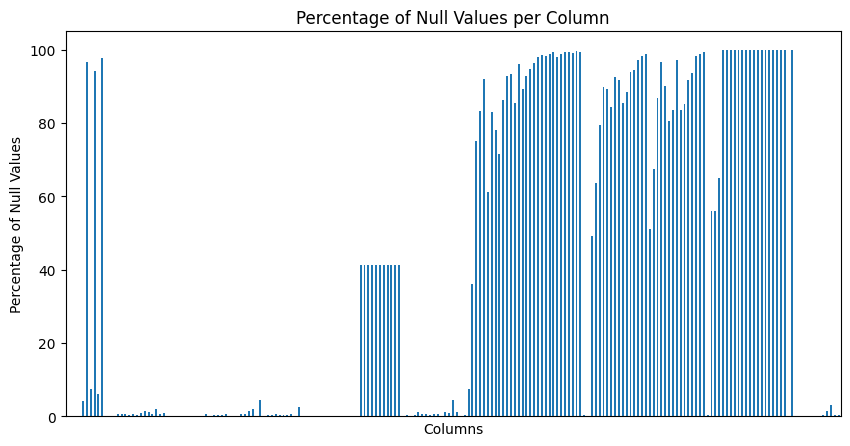

In [26]:
# Plot the percentage of null values per column as a bar chart
plt.figure(figsize=(10, 5))
null_percentage.plot(kind="bar")
plt.ylabel("Percentage of Null Values")
plt.xlabel("Columns")
plt.xticks([])  # Remove x-axis labels
plt.title("Percentage of Null Values per Column")
plt.show()